In [5]:
!pip install selenium==4.0.0

     ------------------------------------- 954.3/954.3 kB 15.2 MB/s eta 0:00:00
  Attempting uninstall: selenium
    Found existing installation: selenium 4.3.0
    Uninstalling selenium-4.3.0:
      Successfully uninstalled selenium-4.3.0


In [1]:
# 네이버에서 검색어 입력받아 검색 한 후 블로그 메뉴를 선택하고
# 오른쪽에 있는 검색옵션 버튼을 눌러서
# 정렬 방식과 기간을 입력하기

#Step 0. 필요한 모듈과 라이브러리를 로딩합니다.
import sys # 시스템
import os  # 시스템
import re  # 정규표현식

import pandas as pd  # 판다스 : 데이터분석 라이브러리
import numpy as np   # 넘파이 : 숫자, 행렬 데이터 라이브러리

from bs4 import BeautifulSoup    # html 데이터를 전처리
from selenium import webdriver   # 웹 브라우저 자동화
from selenium.webdriver.common.keys import Keys
import chromedriver_autoinstaller

import time    # 서버와 통신할 때 중간중간 시간 지연. 보통은 1초
from tqdm import tqdm_notebook   # for문 돌릴 때 진행상황을 %게이지로 알려준다.

# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Step 1. 크롬 웹브라우저 실행
# pip install chromedriver_autoinstaller
import chromedriver_autoinstaller
chrome_path = chromedriver_autoinstaller.install()
driver = webdriver.Chrome(chrome_path)

# 왓투와치 접속
driver.get('https://whattowatch.co.kr/')
time.sleep(2)  # 2초간 정지

In [3]:
# 제목 크롤링
genere_raw = driver.find_elements_by_css_selector(' .movielistdiv .tit_main')

In [4]:
genere_raw[0].text

'내가 보는 컨텐츠'

In [5]:
for i in range(0, len(genere_raw)):
    print(genere_raw[i].text)

내가 보는 컨텐츠
전체 인기순 (17895)
모험 인기순 (863)
판타지 인기순 (654)
애니메이션 인기순 (2272)
드라마 인기순 (7450)
공포 인기순 (772)
액션 인기순 (1581)
코미디 인기순 (4016)
역사 인기순 (425)
서부 인기순 (290)
스릴러 인기순 (1519)
범죄 인기순 (1660)
다큐멘터리 인기순 (1945)
SF 인기순 (629)
미스터리 인기순 (1375)
음악 인기순 (371)
로맨스 인기순 (1395)
가족 인기순 (1432)
전쟁 인기순 (257)
Action & Adventure 인기순 (1238)
Kids 인기순 (599)
News 인기순 (308)
Reality 인기순 (1160)
Sci-Fi & Fantasy 인기순 (1168)
Soap 인기순 (545)
Talk 인기순 (527)
War & Politics 인기순 (430)
TV 영화 인기순 (49)


In [6]:
movie_raw = driver.find_elements_by_css_selector( '.castdiv.scrolldiv1')

In [7]:
movie_raw[0].text

'인기도 12255\n영화\n쥬라기 월드: 도미니언\n7\n인기도 10039\n영화\n탑건: 매버릭\n8.4\n인기도 4929\n영화\n닥터 스트레인지: 대혼돈의 멀티버스\n7.5\n인기도 3805\n영화\n토르: 러브 앤 썬더\n6.8\n인기도 3126\n영화\n수퍼 소닉 2\n8\n인기도 2429\n영화\n아웃핏\n7\n인기도 2420\n영화\n더 렛지\n6.3\n인기도 2121\nTV\n기묘한 이야기\n8.6\n인기도 2008\nTV\n더 보이즈\n8.5\n인기도 1878\n영화\n극장판 주술회전 0\n7.9\n인기도 1784\n영화\n워헌트\n5.4\n인기도 1754\n영화\n스파이더맨: 노 웨이 홈\n8.1\n인기도 1708\nTV\n幸福到万家\n4.5\n인기도 1559\n영화\n신비한 동물들과 덤블도어의 비밀\n6.8\n인기도 1554\nTV\nPantanal\n5.3\n인기도 1488\nTV\nCara e Coragem\n7.1\n인기도 1421\nTV\n미즈 마블\n7.2\n인기도 1347\n영화\n로스트 시티\n6.8\n인기도 1300\n영화\n드래곤볼 슈퍼: 슈퍼 히어로\n8\n인기도 1267\nTV\n터미널 리스트\n8.5'

In [8]:
str(movie_raw[0].text).split('인기도')

['',
 ' 12255\n영화\n쥬라기 월드: 도미니언\n7\n',
 ' 10039\n영화\n탑건: 매버릭\n8.4\n',
 ' 4929\n영화\n닥터 스트레인지: 대혼돈의 멀티버스\n7.5\n',
 ' 3805\n영화\n토르: 러브 앤 썬더\n6.8\n',
 ' 3126\n영화\n수퍼 소닉 2\n8\n',
 ' 2429\n영화\n아웃핏\n7\n',
 ' 2420\n영화\n더 렛지\n6.3\n',
 ' 2121\nTV\n기묘한 이야기\n8.6\n',
 ' 2008\nTV\n더 보이즈\n8.5\n',
 ' 1878\n영화\n극장판 주술회전 0\n7.9\n',
 ' 1784\n영화\n워헌트\n5.4\n',
 ' 1754\n영화\n스파이더맨: 노 웨이 홈\n8.1\n',
 ' 1708\nTV\n幸福到万家\n4.5\n',
 ' 1559\n영화\n신비한 동물들과 덤블도어의 비밀\n6.8\n',
 ' 1554\nTV\nPantanal\n5.3\n',
 ' 1488\nTV\nCara e Coragem\n7.1\n',
 ' 1421\nTV\n미즈 마블\n7.2\n',
 ' 1347\n영화\n로스트 시티\n6.8\n',
 ' 1300\n영화\n드래곤볼 슈퍼: 슈퍼 히어로\n8\n',
 ' 1267\nTV\n터미널 리스트\n8.5']

In [9]:
movie_list = str(movie_raw[0].text).split('인기도')[1:]

pop = []
media = []
title = []
star = []
for m in movie_list:
    temp = m.split('\n')
    pop.append(temp[0])
    media.append(temp[1])
    title.append(temp[2])
    star.append(temp[3])
    
df = pd.DataFrame(data=[title, pop, media, star])

df = df.T

df.columns = (["title", "pop", "media", "star"])

df

,title,pop,media,star
0,쥬라기 월드: 도미니언,12255,영화,7
1,탑건: 매버릭,10039,영화,8.4
2,닥터 스트레인지: 대혼돈의 멀티버스,4929,영화,7.5
3,토르: 러브 앤 썬더,3805,영화,6.8
4,수퍼 소닉 2,3126,영화,8
5,아웃핏,2429,영화,7
6,더 렛지,2420,영화,6.3
7,기묘한 이야기,2121,TV,8.6
8,더 보이즈,2008,TV,8.5
9,극장판 주술회전 0,1878,영화,7.9


In [10]:
images = driver.find_elements_by_css_selector ('.posterimglink')
img_url = []
 
for image in images :
    url = image.get_attribute('src')
    img_url.append(url)

print(img_url[:20])
print(len(img_url))

['https://www.themoviedb.org/t/p/w220_and_h330_face/odxdUZWZ7fBfy3ZRj063wuJnZvo.jpg', 'https://whattowatch.co.kr/static/images/tmdb/poster/b1vaSzxKe9fkqE63uw4hdxTO4na.jpg', 'https://whattowatch.co.kr/static/images/tmdb/poster/at2ezooKtvEakD5EwkVAsB8EHhx.jpg', 'https://whattowatch.co.kr/static/images/tmdb/poster/ifx23jgqQ8ZjUb9eiGjwbKtf0qQ.jpg', 'https://whattowatch.co.kr/static/images/tmdb/poster/8dzKn3RtPWUJRG9ymSpi423eMNV.jpg', 'https://www.themoviedb.org/t/p/w220_and_h330_face/yju3CSIR8fdNsZyPdMsUun7XQnd.jpg', 'https://www.themoviedb.org/t/p/w220_and_h330_face/qXU3lr4YmyT8y6kaX1CcpRiqia2.jpg', 'https://whattowatch.co.kr/static/images/tmdb/poster/mpOQpOKdo2XJnTqRzo1lTmDNsc1.jpg', 'https://whattowatch.co.kr/static/images/tmdb/poster/dzOxNbbz1liFzHU1IPvdgUR647b.jpg', 'https://whattowatch.co.kr/static/images/tmdb/poster/gHcga1wgDD4MAeApoOM7yDn9BOq.jpg', 'https://www.themoviedb.org/t/p/w220_and_h330_face/cNnhQdaq4Rs1aVRRslBP691kyNa.jpg', 'https://whattowatch.co.kr/static/images/tmdb/post

In [15]:
import os 
import urllib
import urllib.request as tr



img_folder = './img'
 
if not os.path.isdir(img_folder) : # 없으면 새로 생성하는 조건문 
    os.mkdir(img_folder)
    
for index, link in enumerate(img_url[:20]) :
#     start = link.rfind('.')
#     end = link.rfind('&')
#     filetype = link[start:end]
	urllib.request.urlretrieve(link, f'./img/{index}.jpg')

In [16]:
df['imgurl'] = img_url[:20]

df

,title,pop,media,star,imgurl
0,쥬라기 월드: 도미니언,12255,영화,7,https://www.themoviedb.org/t/p/w220_and_h330_f...
1,탑건: 매버릭,10039,영화,8.4,https://whattowatch.co.kr/static/images/tmdb/p...
2,닥터 스트레인지: 대혼돈의 멀티버스,4929,영화,7.5,https://whattowatch.co.kr/static/images/tmdb/p...
3,토르: 러브 앤 썬더,3805,영화,6.8,https://whattowatch.co.kr/static/images/tmdb/p...
4,수퍼 소닉 2,3126,영화,8,https://whattowatch.co.kr/static/images/tmdb/p...
5,아웃핏,2429,영화,7,https://www.themoviedb.org/t/p/w220_and_h330_f...
6,더 렛지,2420,영화,6.3,https://www.themoviedb.org/t/p/w220_and_h330_f...
7,기묘한 이야기,2121,TV,8.6,https://whattowatch.co.kr/static/images/tmdb/p...
8,더 보이즈,2008,TV,8.5,https://whattowatch.co.kr/static/images/tmdb/p...
9,극장판 주술회전 0,1878,영화,7.9,https://whattowatch.co.kr/static/images/tmdb/p...


0.45740532875061035


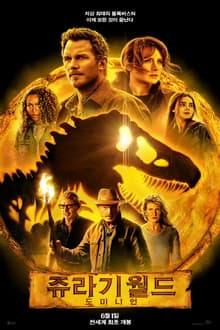

In [17]:
# 이미지 다운 없이도 출력 가능하게

from PIL import Image
from urllib import request
import time
from io import BytesIO

url = img_url[0]

# time check
start = time.time()

# request.urlopen()
# HTTP Error 403: Forbidden 에러 때문에 하단의 소스 한 줄을 추가해주었다.
req = urllib.request.Request(url, headers = {"User-Agent" : "Mozilla/5.0"})
res = request.urlopen(req).read()

# 이미지 다운로드 시간 체크
print(time.time() - start)


# Image open
urlopen_img = Image.open(BytesIO(res))

urlopen_img

In [18]:
# 별점순으로 정렬

df_star = df.sort_values(by=['star'] ,ascending=False)

df_star

,title,pop,media,star,imgurl
7,기묘한 이야기,2121,TV,8.6,https://whattowatch.co.kr/static/images/tmdb/p...
19,터미널 리스트,1267,TV,8.5,https://www.themoviedb.org/t/p/w220_and_h330_f...
8,더 보이즈,2008,TV,8.5,https://whattowatch.co.kr/static/images/tmdb/p...
1,탑건: 매버릭,10039,영화,8.4,https://whattowatch.co.kr/static/images/tmdb/p...
11,스파이더맨: 노 웨이 홈,1754,영화,8.1,https://whattowatch.co.kr/static/images/tmdb/p...
18,드래곤볼 슈퍼: 슈퍼 히어로,1300,영화,8,https://www.themoviedb.org/t/p/w220_and_h330_f...
4,수퍼 소닉 2,3126,영화,8,https://whattowatch.co.kr/static/images/tmdb/p...
9,극장판 주술회전 0,1878,영화,7.9,https://whattowatch.co.kr/static/images/tmdb/p...
2,닥터 스트레인지: 대혼돈의 멀티버스,4929,영화,7.5,https://whattowatch.co.kr/static/images/tmdb/p...
16,미즈 마블,1421,TV,7.2,https://www.themoviedb.org/t/p/w220_and_h330_f...


# 인기도순, 별점순으로 검색해주세요

In [19]:
def print_img(img_url):
    url = img_url
    
    # request.urlopen()
    # HTTP Error 403: Forbidden 에러 때문에 하단의 소스 한 줄을 추가해주었다.
    req = urllib.request.Request(url, headers = {"User-Agent" : "Mozilla/5.0"})
    res = request.urlopen(req).read()

    # Image open
    urlopen_img = Image.open(BytesIO(res))

    display(urlopen_img)

몇위까지 보고 싶으신가요? (19까지 가능)15
인기도순 혹은 별점순으로 검색해주세요별점순
1위 : 기묘한 이야기
별점 : 8.6
미디어 : TV


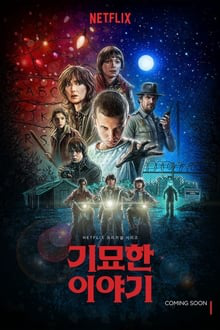


2위 : 터미널 리스트
별점 : 8.5
미디어 : TV


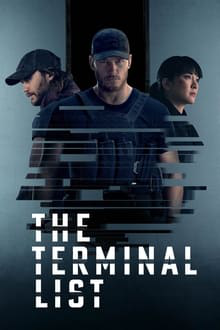


3위 : 더 보이즈
별점 : 8.5
미디어 : TV


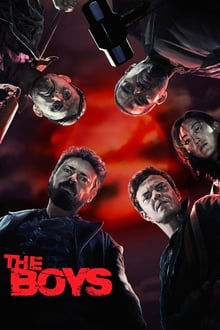


4위 : 탑건: 매버릭
별점 : 8.4
미디어 : 영화


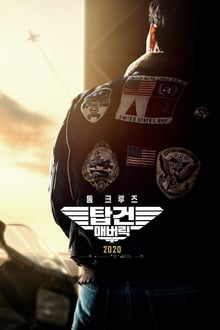


5위 : 스파이더맨: 노 웨이 홈
별점 : 8.1
미디어 : 영화


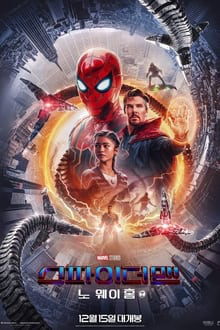


6위 : 드래곤볼 슈퍼: 슈퍼 히어로
별점 : 8
미디어 : 영화


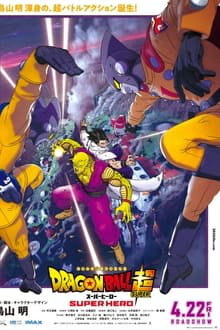


7위 : 수퍼 소닉 2
별점 : 8
미디어 : 영화


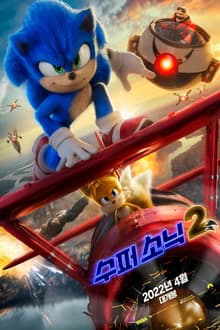


8위 : 극장판 주술회전 0
별점 : 7.9
미디어 : 영화


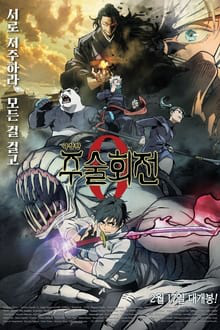


9위 : 닥터 스트레인지: 대혼돈의 멀티버스
별점 : 7.5
미디어 : 영화


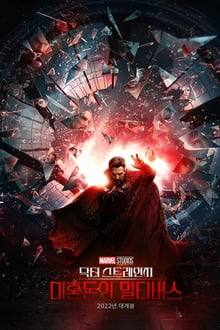


10위 : 미즈 마블
별점 : 7.2
미디어 : TV


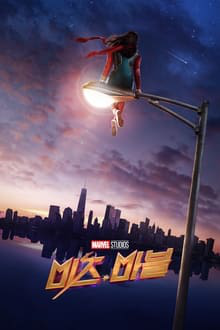


11위 : Cara e Coragem
별점 : 7.1
미디어 : TV


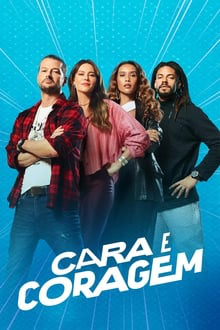


12위 : 쥬라기 월드: 도미니언
별점 : 7
미디어 : 영화


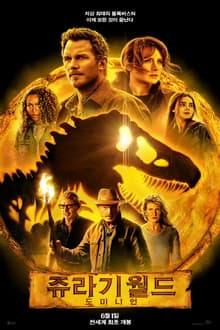


13위 : 아웃핏
별점 : 7
미디어 : 영화


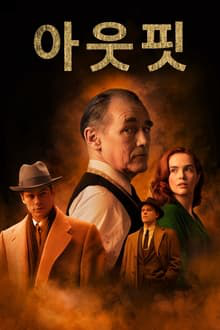


14위 : 신비한 동물들과 덤블도어의 비밀
별점 : 6.8
미디어 : 영화


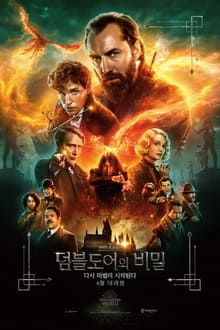


15위 : 로스트 시티
별점 : 6.8
미디어 : 영화


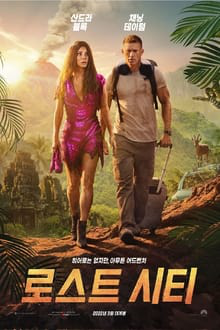

In [20]:
num = int(input("몇위까지 보고 싶으신가요? (19까지 가능)"))
way = input("인기도순 혹은 별점순으로 검색해주세요")

print('=========================================================')
if way == '인기도순':
    for i in range(num):
        temp = df.iloc[i]
        print(f"{i+1}위 : {temp.title}")
        print(f"별점 : {temp.star}")
        print(f"미디어 : {temp.media}")
        print_img(temp.imgurl)
        print("==================================================\n")
elif way == '별점순':
        for i in range(num):
            temp = df_star.iloc[i]
            print(f"{i+1}위 : {temp.title}")
            print(f"별점 : {temp.star}")
            print(f"미디어 : {temp.media}")
            print_img(temp.imgurl)
            print("==============================================\n")
else :
    print("잘못된 입력입니다.")